In [54]:
%matplotlib inline
import numpy as np
import cvxpy as cvx 
from matplotlib import pyplot as plt

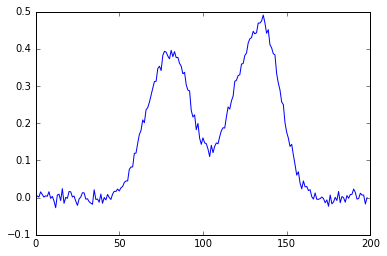

In [53]:
np.random.seed(0)
n = 100
k = 5
sigma = n/10

c = np.exp(-np.arange(-n/2., n/2.)**2./(2*sigma**2))/np.sqrt(2*sigma**2*np.pi)
x0 = np.zeros(n)
x0[np.random.choice(n,k)] = np.random.rand(k)*sigma
b = np.convolve(c, x0) 
b += np.random.randn(2*n-1)*np.linalg.norm(b)/np.sqrt(2*n-1)/20
plt.plot(b)

In [55]:
x = cvx.Variable(n)
f = cvx.sum_squares(cvx.conv(c, x) - b)
prob = cvx.Problem(cvx.Minimize(f), [x >= 0])
prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +6.188e-17  -1.071e-01  +2e+02  9e-01  6e-01  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  -6.797e-01  -9.764e-01  +7e+01  2e-01  2e-01  6e-03  7e-01  0.6335  1e-01   1  1  1 |  0  0
 2  +3.482e-01  +3.274e-01  +3e+01  3e-02  2e-02  4e-02  3e-01  0.8628  3e-01   1  2  1 |  0  0
 3  -7.164e-03  -2.453e-02  +2e+01  2e-02  1e-02  2e-02  2e-01  0.4331  3e-01   1  1  1 |  0  0
 4  +8.367e-02  +7.868e-02  +6e+00  4e-03  3e-03  4e-03  6e-02  0.8606  2e-01   1  2  2 |  0  0
 5  +3.260e-02  +3.184e-02  +8e-01  5e-04  4e-04  5e-04  8e-03  0.9197  7e-02   1  1  1 |  0  0
 6  +2.164e-02  +2.140e-02  +2e-01  1e-04  1e-04  1e-04  2e-03  0.9521  3e-01   1  1  1 |  0  0
 7  +2.205e-02  +2.195e-02  +1e-01  4e-05  4e-05  5e-05  9e-04  0.7559  2e-01   1  1  1 |  0  0
 8  +2.130e-02  +2.126e-02  +4e-02  2e-05  2e-

0.021157661744026446

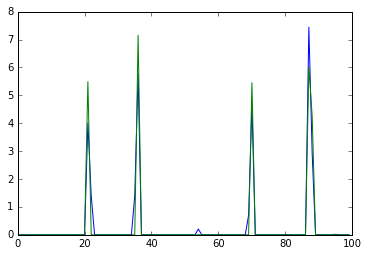

In [58]:
plt.plot(x.value)
plt.plot(x0)